/var/folders/65/1b1td3_n3f977_x9vc2b967w0000gn/T/ipykernel_99355/705224730.py:122: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog='dot')


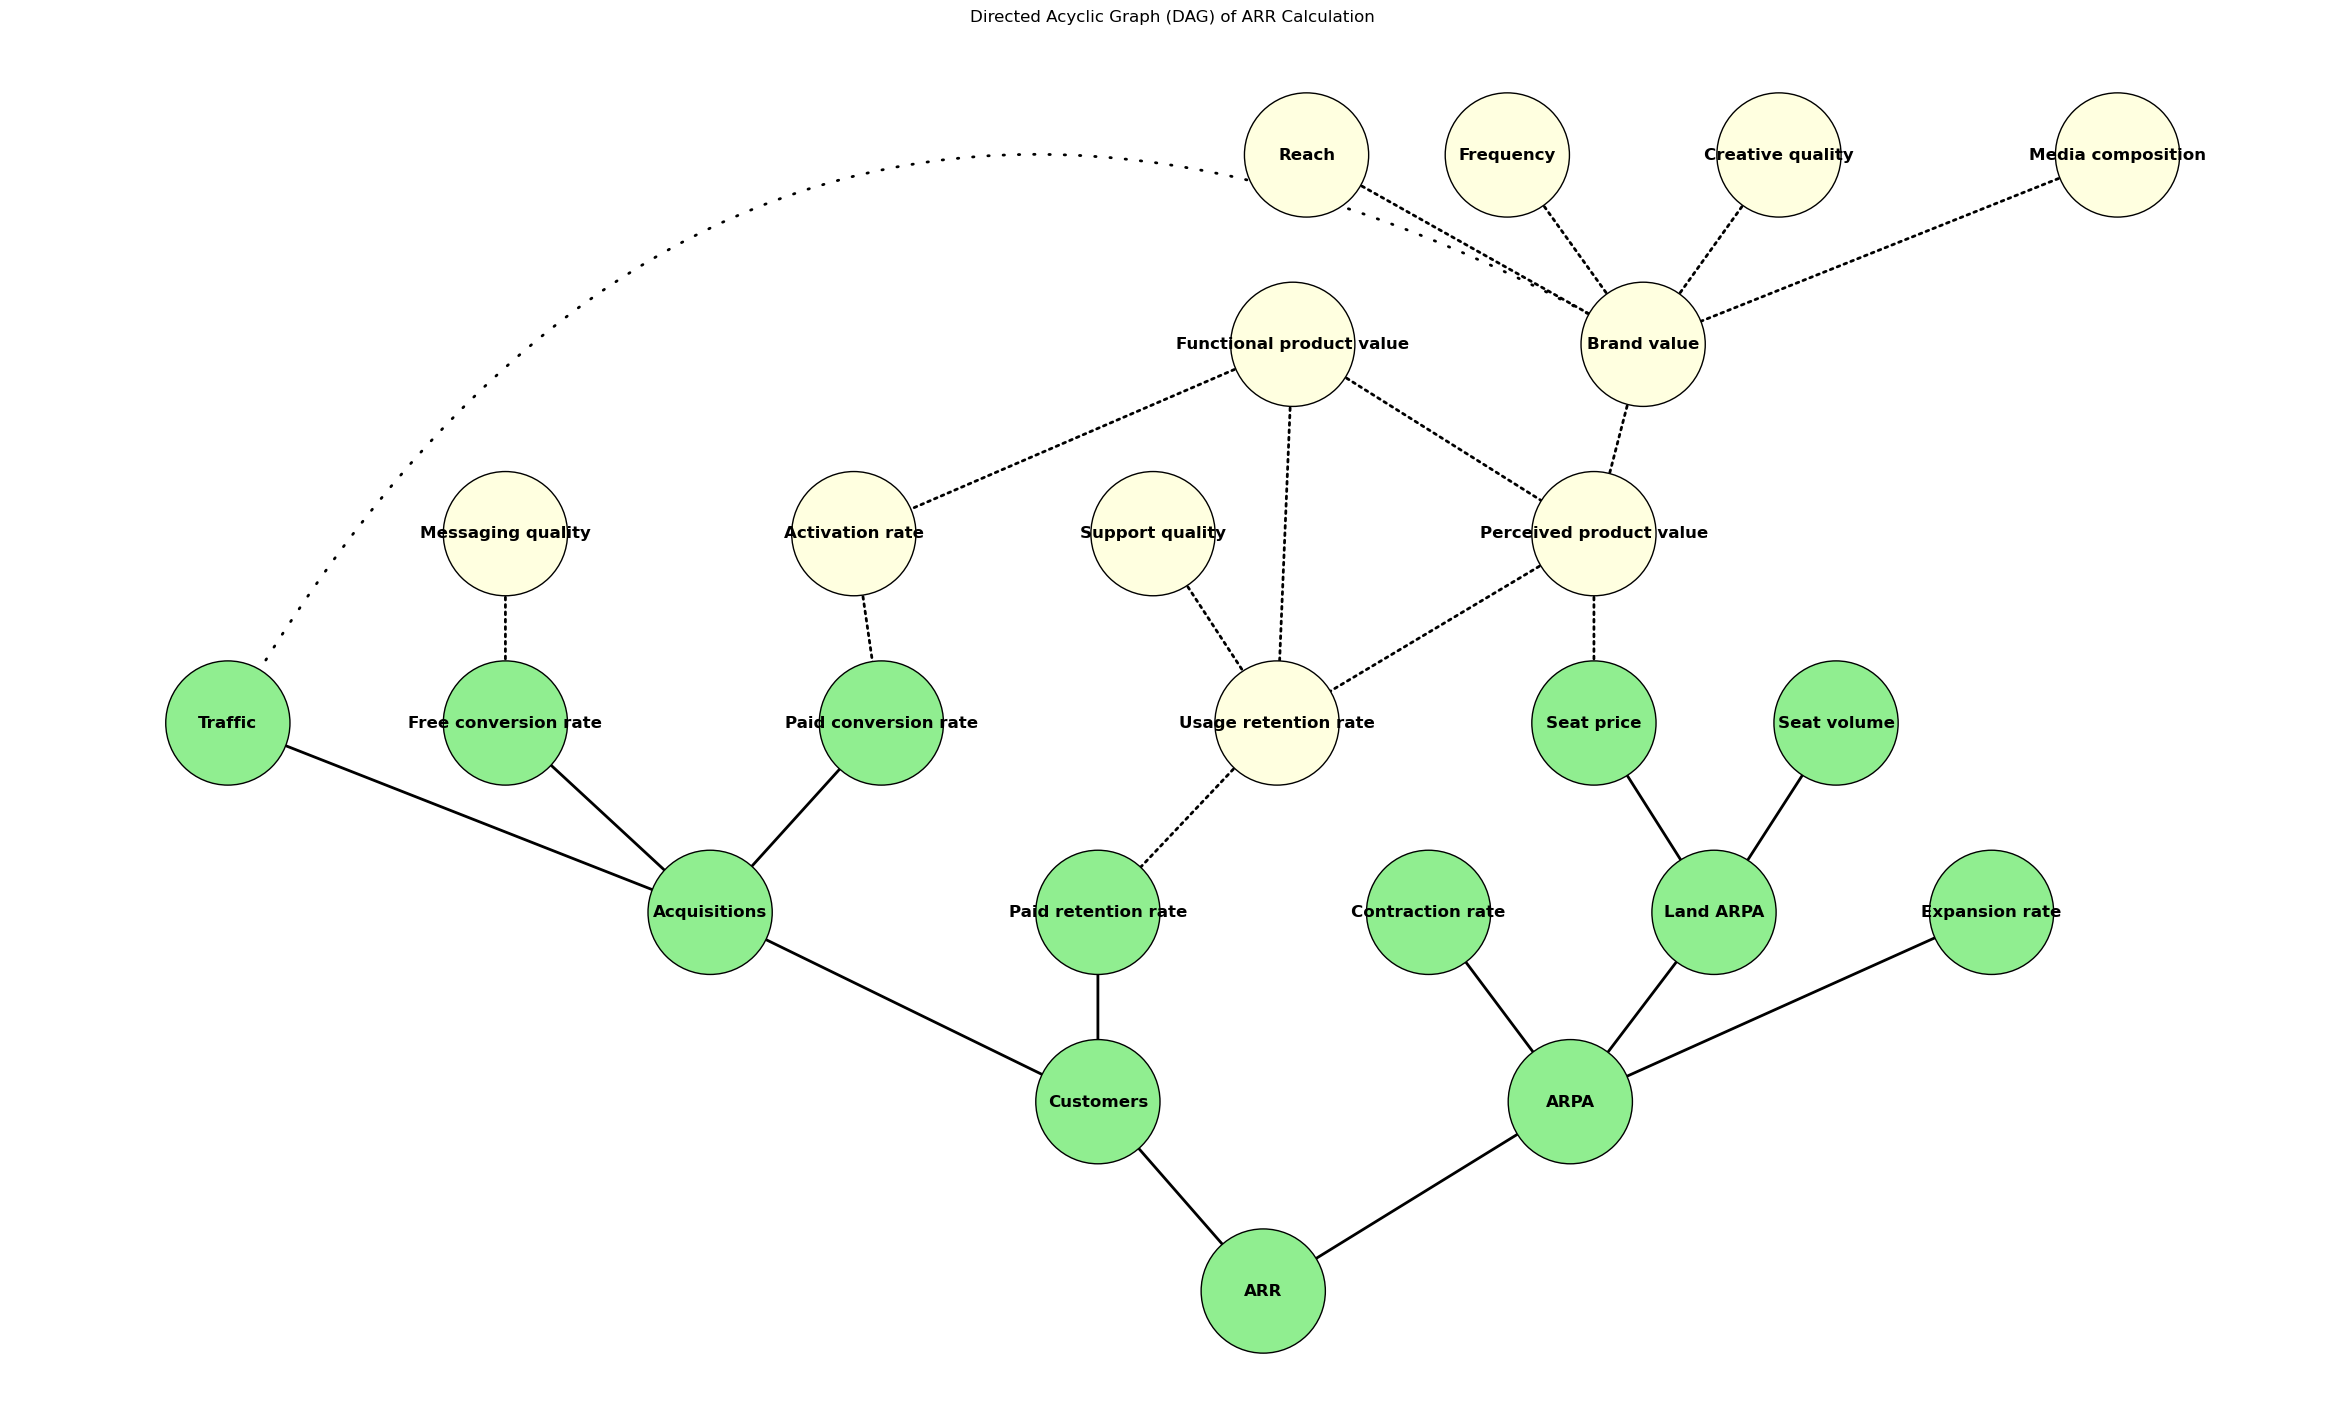

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.patches import FancyArrowPatch
from matplotlib.patheffects import withStroke

def format_label(label):
    words = label.split()
    if len(words) > 3:
        midpoint = len(words) // 2
        return "\n".join([" ".join(words[:midpoint]), " ".join(words[midpoint:])])
    return label

def draw_graph(G, pos, edge_styles, special_nodes, curved_edges):
    # Determine node colors based on outgoing edges
    node_colors = []
    for node in G.nodes():
        if node in special_nodes:
            node_colors.append('lightyellow')
        else:
            outgoing_edges = list(G.out_edges(node))
            if all(edge_styles.get(edge, "solid") != "dotted" for edge in outgoing_edges) or not outgoing_edges:
                node_colors.append('lightgreen')
            else:
                node_colors.append('lightyellow')

    # Format labels
    labels = {node: format_label(node) for node in G.nodes()}

    # Draw nodes with specific colors
    nx.draw_networkx_nodes(G, pos, node_size=8000, node_color=node_colors, edgecolors='black')
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=12, font_weight='bold')

    # Draw edges
    for edge in G.edges():
        style = edge_styles.get(edge, "solid")
        nx.draw_networkx_edges(
            G, pos, edgelist=[edge], style=style, arrowstyle='-|>', arrowsize=40,
            edge_color='black', width=2)

    # Draw curved edges
    ax = plt.gca()
    for (src, dst), curve in curved_edges.items():
        rad = curve.get("rad", 0.3)  # default curvature
        arrowstyle = curve.get("arrowstyle", '->')
        linestyle = curve.get("linestyle", "dotted")
        connectionstyle = f"arc3,rad={rad}"
        arrow = FancyArrowPatch(pos[src], pos[dst], connectionstyle=connectionstyle,
                                color='black', arrowstyle=arrowstyle, mutation_scale=15,
                                linestyle=(0, (1, 10)), path_effects=[withStroke(linewidth=2, foreground='black')])
        ax.add_patch(arrow)

# Create a directed graph
G = nx.DiGraph()

# Define nodes for each part of the bipartite graph
part_1 = ["Traffic", "Free conversion rate", "Paid conversion rate", "Activation rate", 
          "Land ARPA", "Expansion rate", "Contraction rate", "Paid retention rate", "Perceived product value", 
          "Seat price", "Seat volume", "Usage retention rate", "Support quality", "Functional product value", 
          "Brand value", "Reach", "Frequency", "Creative quality", "Media composition", "Messaging quality"]
part_2 = ["Acquisitions", "Customers", "ARPA", "ARR"]

# Add edges to the graph
edges = [
    ("Customers", "ARR"),
    ("ARPA", "ARR"),
    ("Acquisitions", "Customers"),
    ("Paid retention rate", "Customers"),
    ("Traffic", "Acquisitions"),
    ("Free conversion rate", "Acquisitions"),
    ("Paid conversion rate", "Acquisitions"),
    ("Activation rate", "Paid conversion rate"),
    ("Land ARPA", "ARPA"),
    ("Expansion rate", "ARPA"),
    ("Contraction rate", "ARPA"),
    ("Seat price", "Land ARPA"),
    ("Seat volume", "Land ARPA"),
    ("Perceived product value", "Seat price"),
    ("Usage retention rate", "Paid retention rate"),
    ("Support quality", "Usage retention rate"),
    ("Functional product value", "Perceived product value"),
    ("Brand value", "Perceived product value"),
    ("Functional product value", "Activation rate"),
    ("Functional product value", "Usage retention rate"),
    ("Perceived product value", "Usage retention rate"),
    ("Reach", "Brand value"),
    ("Frequency", "Brand value"),
    ("Creative quality", "Brand value"),
    ("Media composition", "Brand value"),
    ("Messaging quality", "Free conversion rate")
]

# Add nodes and edges to the graph
G.add_nodes_from(part_1, bipartite=0)
G.add_nodes_from(part_2, bipartite=1)
G.add_edges_from(edges)

# Define edge styles
edge_styles = {
    ("Activation rate", "Paid conversion rate"): "dotted",
    ("Perceived product value", "Seat price"): "dotted",
    ("Usage retention rate", "Paid retention rate"): "dotted",
    ("Support quality", "Usage retention rate"): "dotted",
    ("Functional product value", "Perceived product value"): "dotted",
    ("Brand value", "Perceived product value"): "dotted",
    ("Functional product value", "Activation rate"): "dotted",
    ("Functional product value", "Usage retention rate"): "dotted",
    ("Perceived product value", "Usage retention rate"): "dotted",
    ("Reach", "Brand value"): "dotted",
    ("Frequency", "Brand value"): "dotted",
    ("Creative quality", "Brand value"): "dotted",
    ("Media composition", "Brand value"): "dotted",
    ("Messaging quality", "Free conversion rate"): "dotted"
}

# Define curved edges
curved_edges = {
    ("Brand value", "Traffic"): {"rad": 0.5, "linestyle": "dotted"}
}

# Get positions for the nodes using graphviz layout
pos = graphviz_layout(G, prog='dot')

# Scale up the positions to spread out nodes halfway
scale = 1.5
pos = {node: (x * scale, y * scale) for node, (x, y) in pos.items()}

# Special nodes
special_nodes = ["Messaging quality"]

# Draw the graph with different edge styles
plt.figure(figsize=(30, 18))
draw_graph(G, pos, edge_styles, special_nodes, curved_edges)

plt.title("Directed Acyclic Graph (DAG) of ARR Calculation")
plt.margins(x=0.1, y=0.1)  # Add padding around the plot
plt.axis("off")
plt.show()